### 卷积层

##### 全连接层存在的问题
在全连接层中，相邻层的神经元全部连接在一起，输出的数量可以任意决定。

全连接层存在什么问题呢？那就是数据的形状被“忽视”了。比如，输入数据是图像时，图像通常是高、长、通道方向上的3维形状。但是，向全连接层输入时，需要将3维数据拉平为1维数据。

图像是3维形状，这个形状中应该含有重要的空间信息。比如，空间上邻近的像素为相随的值、RGB的各个通道之间分别有密切的关联性、相距较远的像素之间没有什么关联等，3维数形状中可能隐藏有值得提取的本质模式。但是，因为全连接层会忽视形状，将全部的输入数据作为相同的神经元（同一维度的神经元）处理，所以无法利用与形状相关的信息。

而卷积层可以保持形状不变。当输入数据是图像时，卷积层会以3维数据的形式接收输入数据，并同样以3维数据的形式输出至下一层。因此，在 CNN 中，可以（有可能）正确理解图像等具有形状的数据。

另外，CNN 中，有时将卷积层的输入输出数据成为**特征图**(feature map)。<br>其中，卷积层的输入数据称为**输入特征图(input feature map)**，输出数据称为**输出特征图**(output feature map)。


#### 卷积运算
卷积层进行的处理就是卷积运算。卷积运算相当于图像处理中的“滤波器运算”。

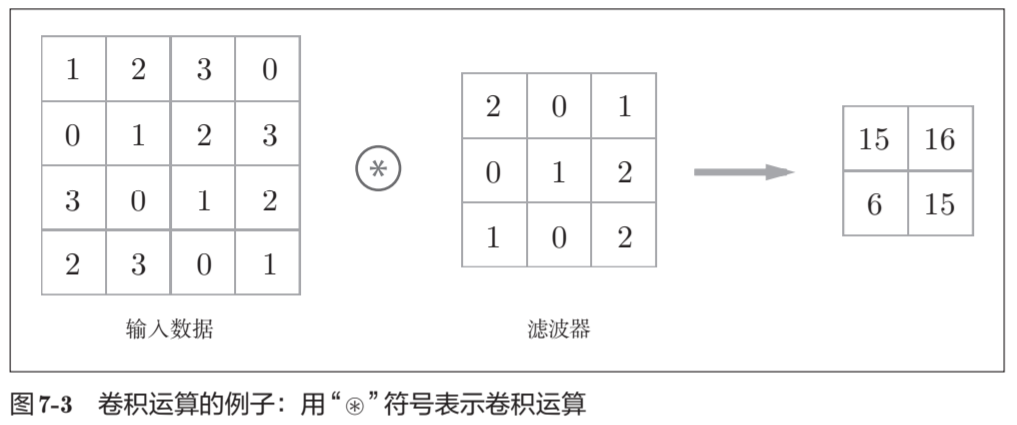

如图所示，卷积运算对输入数据应用滤波器。<br>

在这个例子中，输入数据是有高长方向的形状的数据，滤波器也一样，有高长方向上的维度。<br>

假设用（height, width）表示数据和滤波器的形状，则在本例中，输入大小是(4, 4)，滤波器大小是(3, 3)，输出大小是(2, 2)。<br>

另外，有的文献中也会用“核”这个词来表示这里所说的“滤波器”。

对于输入数据，卷积运算以一定间隔滑动滤波器的窗口并应用。下图为卷积运算的计算顺序。
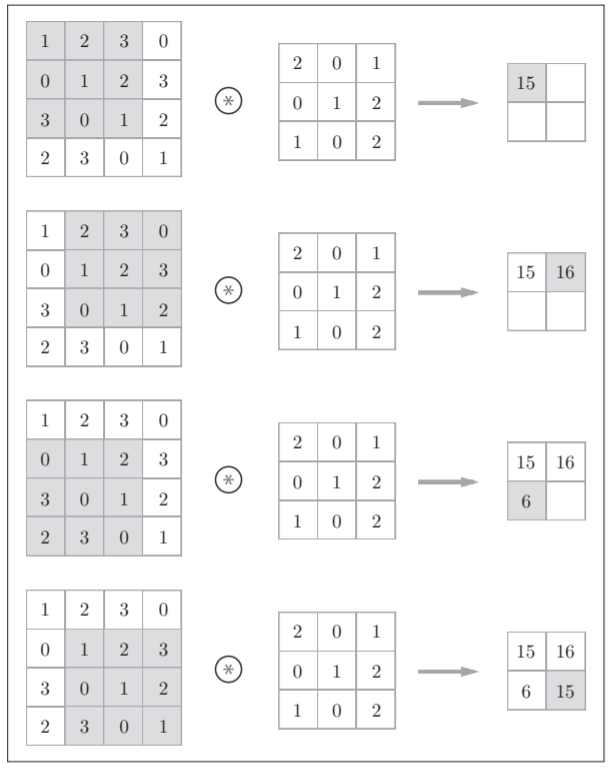

在全连接的神经网络中，除了权重参数，还存在偏置。<br>

CNN中，滤波器的参数就对应之前的权重。并且，CNN中也存在偏置。<br>

包含偏置的卷积运算的处理流如下图。
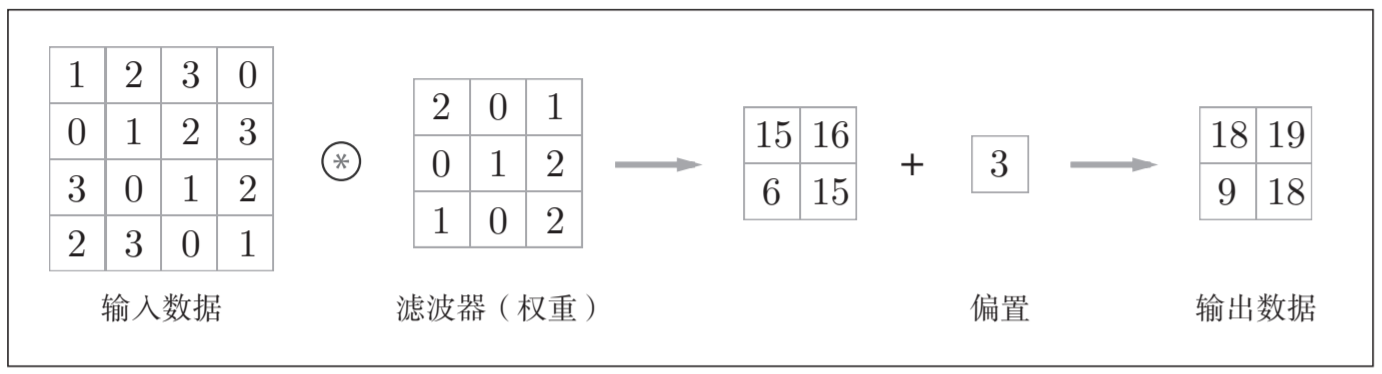

#### 填充
在进行卷积层的处理之前，有时要向输入数据的周围填入固定的数据（比如0等），这称为**填充**(padding)，是卷积运算中经常会用到的处理。

下图中对大小为(4, 4)的输入数据应用了幅度为1的填充。“幅度为1的填充”是指用幅度为1像素的0填充周围。

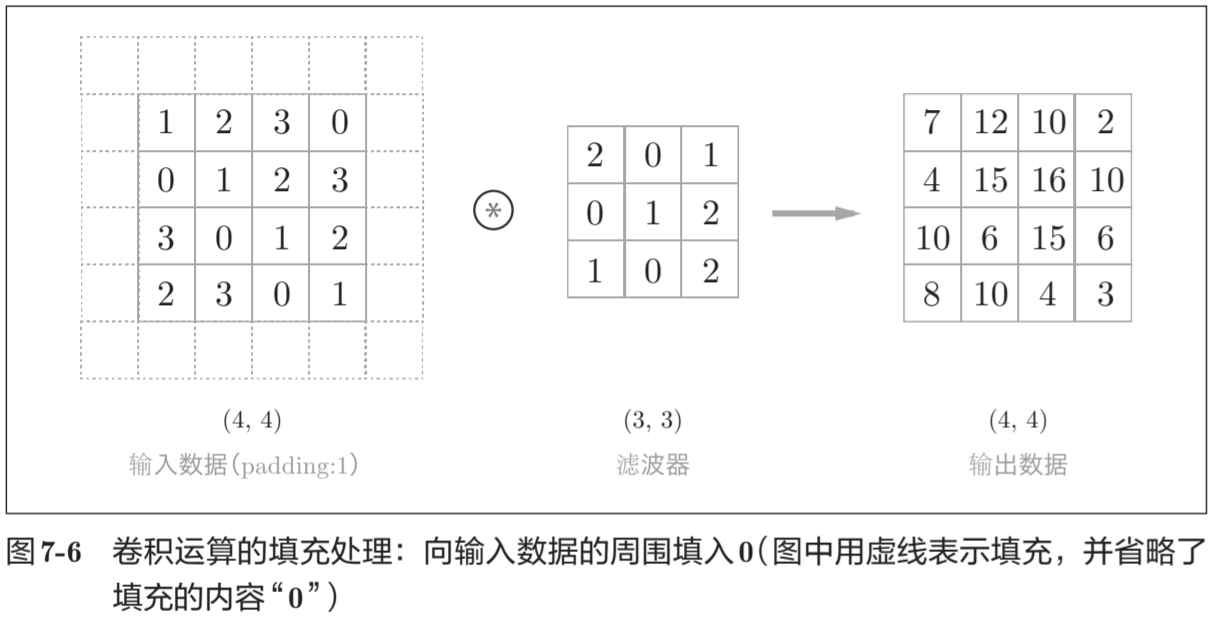

如图所示，通过填充，大小为(4, 4)的输入数据变成了(6, 6)的形状。<br>

然后，应用大小为(3, 3)的滤波器，生成了大小为(4, 4)的输出数据。<br>

这个例子中将填充设成了1，不过填充的值也可以设置成2、3等任意的整数。

---

**使用填充主要是为了调整输出的大小。** <br>

比如，对大小为(4, 4)的输入数据应用(3, 3)的滤波器时，输出大小变为(2, 2)，相当于输出大小比输入大小缩小了2个元素。<br>

如果每次进行卷积运算都会缩小空间，那么在某个时刻输出大小就有可能变为 1，导致无法再应用卷积运算。为了避免出现这样的情况，就要使用填充。<br>

在刚才的例子中，将填充的幅度设为 1，那么相对于输入大小(4, 4)，输出大小也保持为原来的(4, 4)。<br>

因此，**卷积运算就可以在保持空间大小不变的情况下将数据传给下一层**。

---

#### 步幅
应用滤波器的位置间隔称为**步幅**（stride）。<br>

之前的例子中步幅都是1，如果将步幅设为2，则如下图所示，应用滤波器的窗口的间隔变为2个元素。

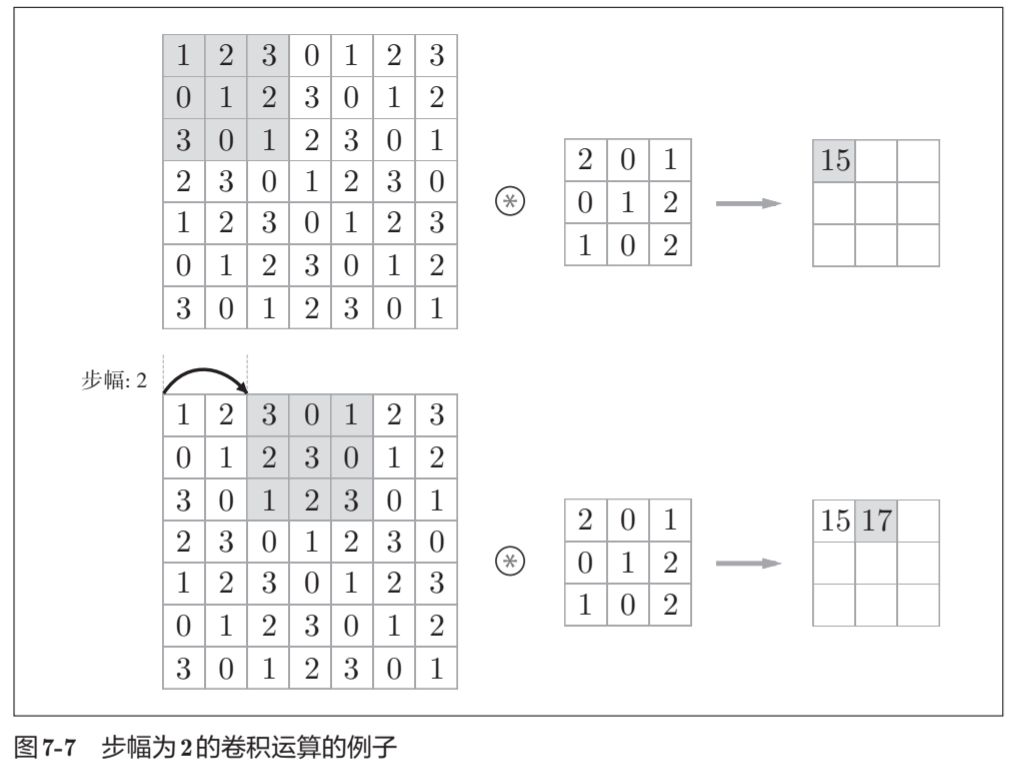

上图中，对输入大小为(7, 7)的数据，以步幅2应用了滤波器。通过将步幅设为2，输出大小变为(3, 3)。像这样，步幅可以指定应用滤波器的间隔。


综上，**增大步幅后，输出会变小。而增大填充后，输出会变大。**


我们将这样的关系写成算式，对于填充和步幅，如何计算输出大小。<br>
假设**输入大小为(H, W)**，**滤波器大小为(FH, FW)**，**输出大小为(OH, OW)**，**填充为P**，**步幅为S**。此时，输出大小可通过下式进行计算。
$$
OH = \frac{H+2P-FH}{S} + 1
$$
$$
OW = \frac{W+2P-FW}{S} + 1
$$

我们使用这个算式，试着做几个计算。
例1：图7-6的例子<br>
输入大小：(4, 4)；填充：1；步幅：1；滤波器大小：(3, 3)<br>
$$
OH = \frac{4+2\cdot 1-3}{1} + 1 = 4
$$
$$
OW = \frac{4+2\cdot 1-3}{1} + 1 = 4
$$

例2：图7-7的例子<br>
输入大小：(7, 7)；填充：0；步幅：2；滤波器大小：(3, 3)<br>
$$
OH = \frac{7+2\cdot 0-3}{1} + 1 = 3
$$
$$
OW = \frac{7+2\cdot 0-3}{2} + 1 = 3
$$

例3<br>
输入大小：(28, 31)；填充：2；步幅：3；滤波器大小：(5, 5)<br>
$$
OH = \frac{28+2\cdot 2-5}{3} + 1 = 10
$$
$$
OW = \frac{31+2\cdot 2-5}{3} + 1 =11
$$

这里需要注意的是，虽然只要代入值就可以计算输出大小，但是所设定的值必须使式中的$\frac{H+2P-FH}{S}$和$\frac{W+2P-FW}{S}$分别可以除尽。<br>

当输出大小无法除尽时（结果是小数时），需要采取报错等对策。<br>

根据深度学习的框架的不同，当值无法除尽时，有时会向最接近的整数四舍五入，不进行报错而继续运行。

#### 3维数据的卷积运算

之前的卷积运算的例子都是以有高、长方向的2维形状为对象的。<br>

但是，图像是3维数据，除了高、长方向之外，还需要处理通道方向。<br>

我们按照与之前相同的顺序，看一下对加上了通道方向的3维数据进行卷积运算的例子。

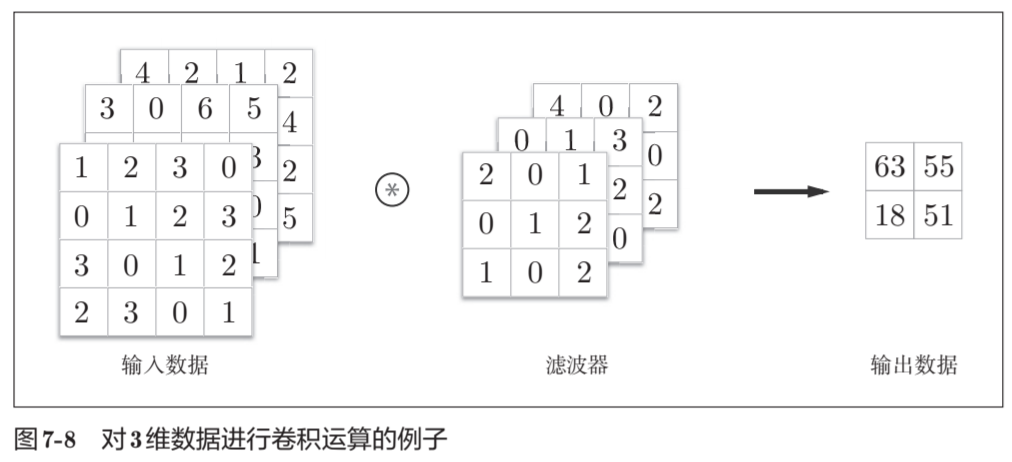

图7-8是卷积运算的例子。这里以3通道的数据为例，展示了卷积运算的结果。<br>

和2维数据时相比，可以发现纵深方向（通道方向）上特征图增加了。<br>

通道方向上有多个特征图时，会**按通道进行输入数据和滤波器的卷积运算**，**并将结果相加**，从而得到输出。

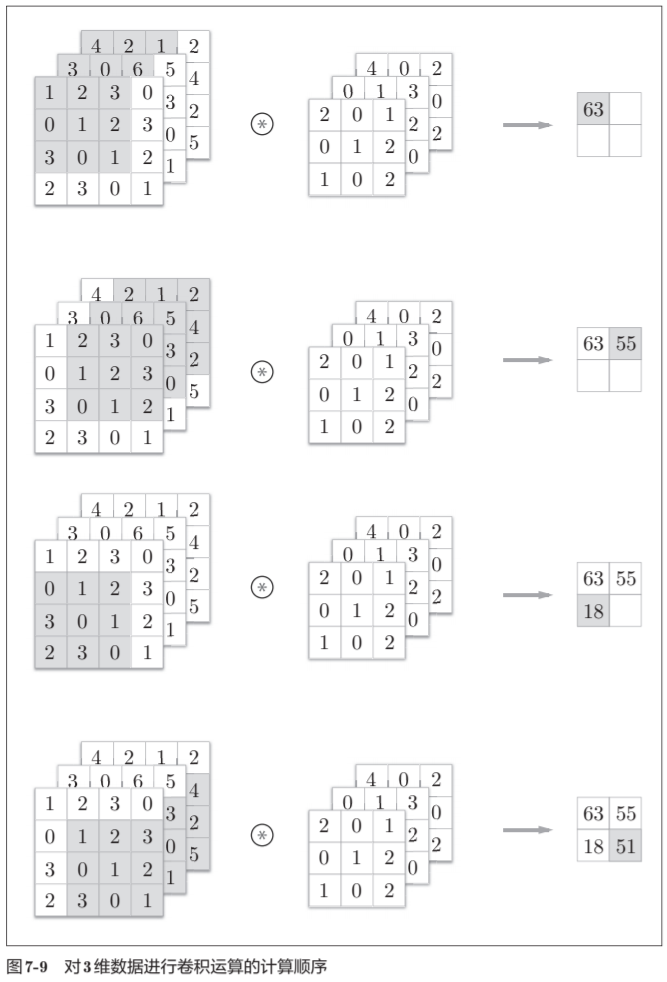

需要注意如下几点，<br>

**在3维数据的卷积运算中，输入数据和滤波器的通道数要设为相同的值。** 在这个例子中，输入数据和滤波器的通道数一致，均为3。<br> 

**滤波器大小可以设定为任意值（不过，每个通道的滤波器大小要全部相同）**。这个例子中滤波器大小为(3, 3)，但也可以设定为(2, 2)、(1, 1)、(5, 5)等任意值。

#### 结合方块思考
将数据和滤波器结合长方体的方块来考虑，3维数据的卷积运算会很容易理解。<br>

方块是如图7-10所示的3维长方体。把3维数据表示为多维数组时，书写顺序为（channel, height, width）。
* 比如，通道数为C、高度为H、长度为W的数据的形状可以写成（C, H, W）。

滤波器也一样，要按（channel,height, width）的顺序书写。
* 比如，通道数为C、滤波器高度为FH（FilterHeight）、长度为FW（Filter Width）时，可以写成（C, FH, FW）。

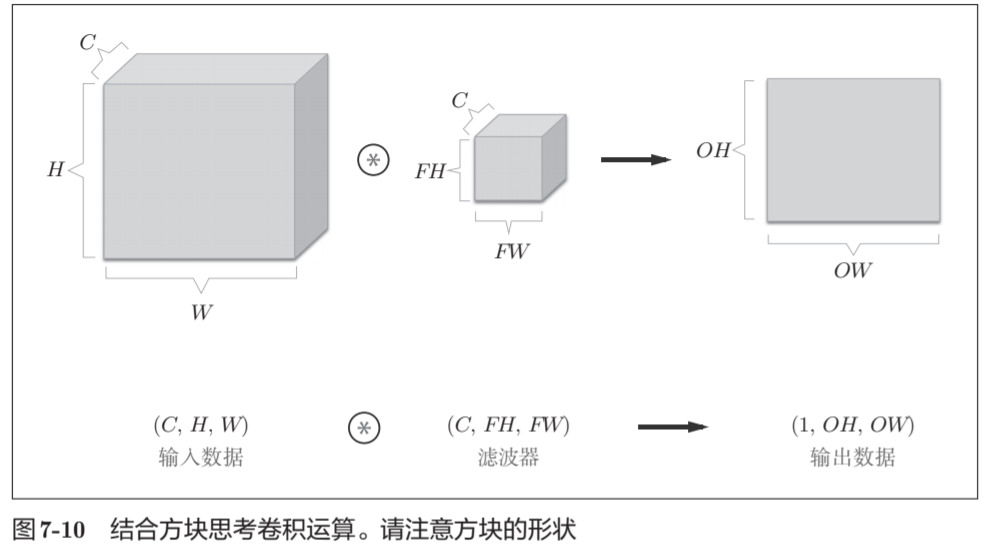

在这个例子中，数据输出是1张特征图。所谓1张特征图，换句话说，就是通道数为1的特征图。<br>

那么，如果要在通道方向上也拥有多个卷积运算的输出，该怎么做呢？为此，就需要**用到多个滤波器（权重）**。用图表示的话，如图7-11所示。

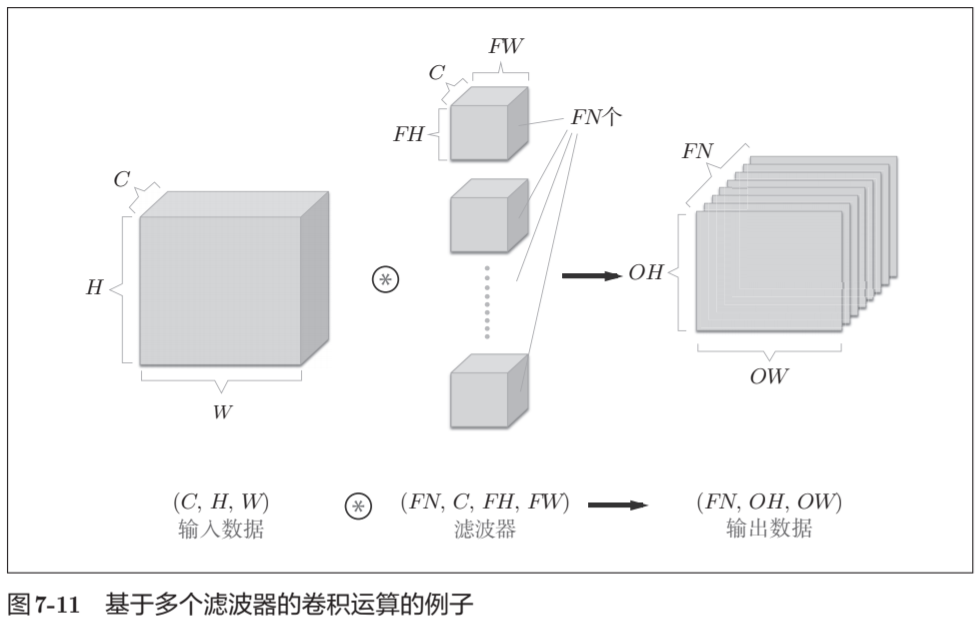

图7-11中，通过应用FN个滤波器，输出特征图也生成了FN个。如果将这FN个特征图汇集在一起，就得到了形状为(FN, OH, OW)的方块。将这个方块传给下一层，就是CNN的处理流。<br>

如图 7-11 所示，关于卷积运算的滤波器，也必须考虑滤波器的数量。因此，作为4维数据，滤波器的权重数据要按(output_channel, input_channel, height, width)的顺序书写。比如，通道数为3、大小为5 × 5的滤波器有20个时，可以写成(20, 3, 5, 5)。

卷积运算中（和全连接层一样）存在偏置。在图7-11的例子中，如果进一步追加偏置的加法运算处理，则结果如下面的图7-12所示。<br>


图7-12中，每个通道只有一个偏置。这里，偏置的形状是(FN, 1, 1)，滤波器的输出结果的形状是(FN, OH, OW)。<br>


这两个方块相加时，要对滤波器的输出结果(FN, OH, OW)按通道加上相同的偏置值。<br>

另外，不同形状的方块相加时，可以基于NumPy的广播功能轻松实现。

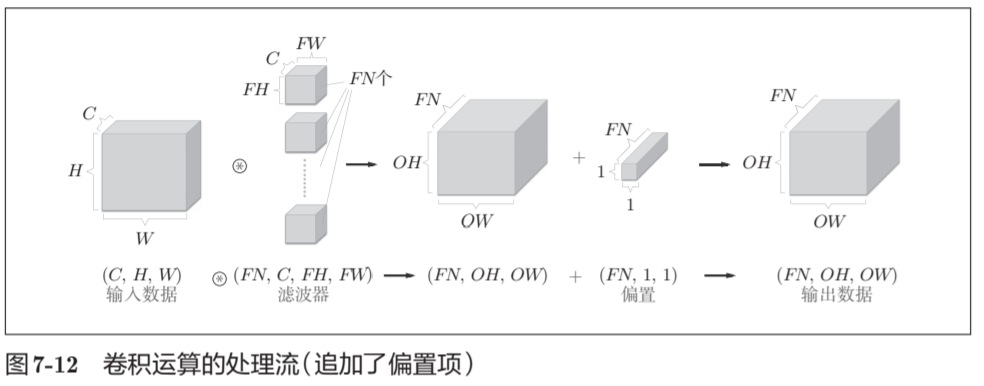

#### 批处理

神经网络的处理中进行了将输入数据打包的批处理。通过批处理，能够实现处理的高效化和学习时对 mini-batch 的对应。<br>

我们希望卷积运算也同样对应批处理，为此，需要将在各层间传递的数据保存为4维数据。<br>

具体地讲，就是按(batch_num, channel, height, width)的顺序保存数据。<br>

比如，将图7-12中的处理改成对N个数据进行批处理时，数据的形状如图7-13所示。<br>

图7-13的批处理版的数据流中，在各个数据的开头添加了批用的维度。像这样，数据作为4维的形状在各层间传递。<br>

这里需要注意的是，网络间传递的是4维数据，对这N个数据进行了卷积运算。也就是说，批处理将N次的处理汇总成了1次进行。
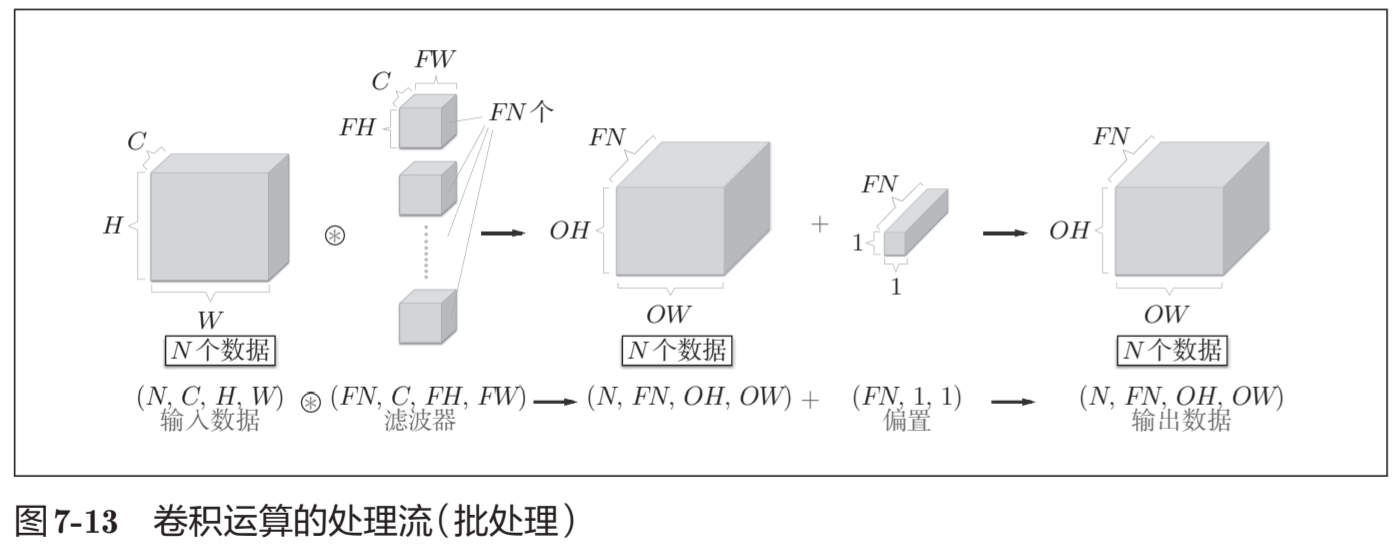